# import library

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np 
import matplotlib.pyplot as plt 

# Get MNIST Data.

## MNIST data loacted in tensorflow > keras > datasets > mnist

## Split data to (train images, train labels) and (test images, test labels)

In [3]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 6s 1us/step


## There are Total 60000 Train images and Train labels. (6000 images for single class)

## Shape of single image is 28 x 28 (pixel)

In [4]:
print('Shape of Train images :',train_images.shape)
print('Shape of Train labels : ', train_labels.shape)
print('\nShape of Test images : ', test_images.shape)
print("Shape of Test labels : ",test_labels.shape)

Shape of Train images : (60000, 28, 28)
Shape of Train labels :  (60000,)

Shape of Test images :  (10000, 28, 28)
Shape of Test labels :  (10000,)


In [5]:
print('Train labels : ',train_labels)

Train labels :  [5 0 4 ... 5 6 8]


## Plot first train image.
### when value is close to 0 : dark
### when value is close to 255 : white

In [6]:
print(train_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

## Plot First 10 Train images and Corresponding labels

First 10 Train images in MNIST dataset



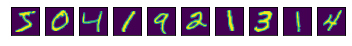


Train labels match with Train label sequentialy
 [5 0 4 1 9 2 1 3 1 4]


In [7]:
print('First 10 Train images in MNIST dataset\n')
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
plt.show()
print('\nTrain labels match with Train label sequentialy\n',train_labels[:10])

## Important
## Change data shape (60000 x 28 x 28) to (60000 x 28 x 28 x 1)

In [8]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

## Select one convolution model below
### There are 3 example models.
### 3, 5, 7 layer each
## MODEL 1 : 3 Layers with 1 Convolution layer
## MODEL 2 : 5 Layers with 2 Convolution layer
## MODEL 3 : 7 Layers with 4 Convolution layer

In [9]:
def select_model(model_number):
    if model_number == 1:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2 
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 3

    if model_number == 2:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),     # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 4
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 5
                    
    if model_number == 3: 
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 4
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 5
                    keras.layers.Conv2D(128, (3,3), activation = 'relu'),                           # layer 6
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 7
    
    return model 

In [10]:
model = select_model(1)

In [24]:
model2 = select_model(2)

In [25]:
model3 = select_model(3)

## If you want to see information of model, model.summary() will help
## summary() is also built in function

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [27]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [28]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 2, 2, 128)        

## Components in training step
## Optimizer, Loss function, accuracy metrics

In [12]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [29]:
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [30]:
model3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

## Training Step
## Training for 5 epochs.

In [13]:
model.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 26s 13ms/step - loss: 0.5184 - accuracy: 0.9391
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0838 - accuracy: 0.9756
Epoch 3/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0712 - accuracy: 0.9782
Epoch 4/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0604 - accuracy: 0.9818
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0518 - accuracy: 0.9839


In [58]:
model2.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0377 - accuracy: 0.9884
Epoch 2/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0314 - accuracy: 0.9907
Epoch 3/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0290 - accuracy: 0.9915
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0295 - accuracy: 0.9916
Epoch 5/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0243 - accuracy: 0.9933


In [32]:
model3.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2510 - accuracy: 0.9511
Epoch 2/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0600 - accuracy: 0.9811
Epoch 3/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0468 - accuracy: 0.9851
Epoch 4/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0418 - accuracy: 0.9869
Epoch 5/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0358 - accuracy: 0.9890


## Test Step
## Perform Test with Test data

In [47]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

313/313 - 2s - loss: 0.1052 - accuracy: 0.9744 - 2s/epoch - 6ms/step

Test loss :  0.10519491881132126
Test accuracy : 0.974399983882904


In [59]:
test_loss2, accuracy2 = model2.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss2)
print('Test accuracy :', accuracy2)

313/313 - 2s - loss: 0.0710 - accuracy: 0.9857 - 2s/epoch - 8ms/step

Test loss :  0.07099452614784241
Test accuracy : 0.9857000112533569


In [49]:
test_loss3, accuracy3 = model3.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss3)
print('Test accuracy :', accuracy3)

313/313 - 3s - loss: 0.0411 - accuracy: 0.9865 - 3s/epoch - 9ms/step

Test loss :  0.041070692241191864
Test accuracy : 0.9865000247955322


In [15]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

313/313 [==============================] - 2s 5ms/step


In [60]:
test_images = tf.cast(test_images, tf.float32)
pred2 = model2.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

313/313 [==============================] - 2s 6ms/step


In [43]:
test_images = tf.cast(test_images, tf.float32)
pred3 = model3.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

313/313 [==============================] - 3s 9ms/step


In [16]:
print('Prediction : ', pred.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


In [61]:
print('Prediction : ', pred2.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


In [45]:
print('Prediction : ', pred3.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


## Functions for plot images, probability

In [17]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                100*np.max(predictions_array),
                                Number[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    plt.xticks(Number)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [18]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

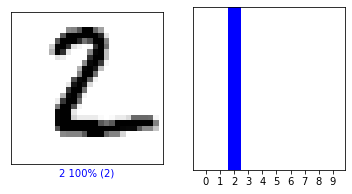

In [19]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred,  test_labels)
plt.show()

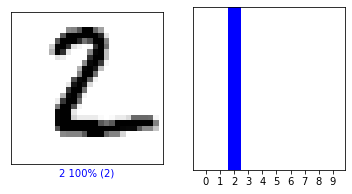

In [62]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred2, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred2,  test_labels)
plt.show()

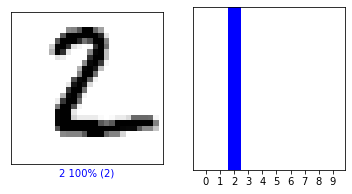

In [57]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred3, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred3,  test_labels)
plt.show()

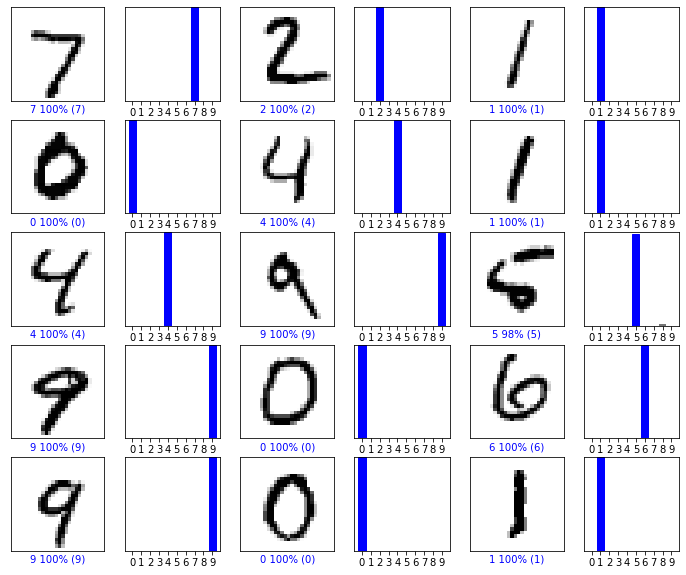

In [20]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred, test_labels)
plt.show()

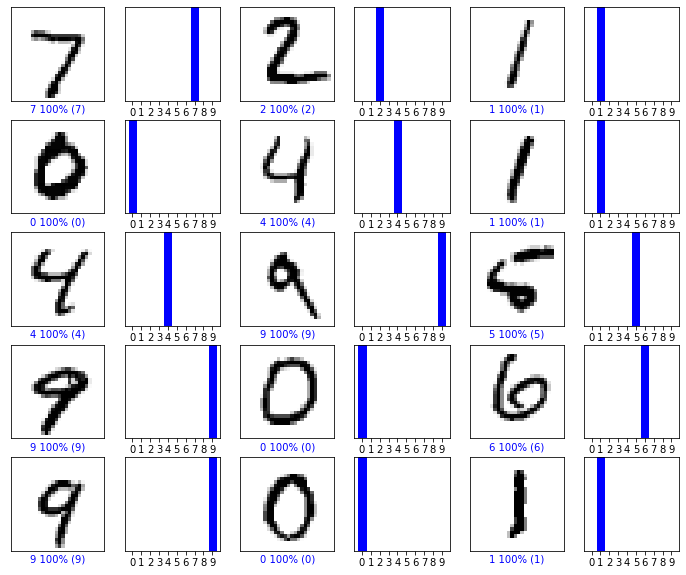

In [63]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred2, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred2, test_labels)
plt.show()

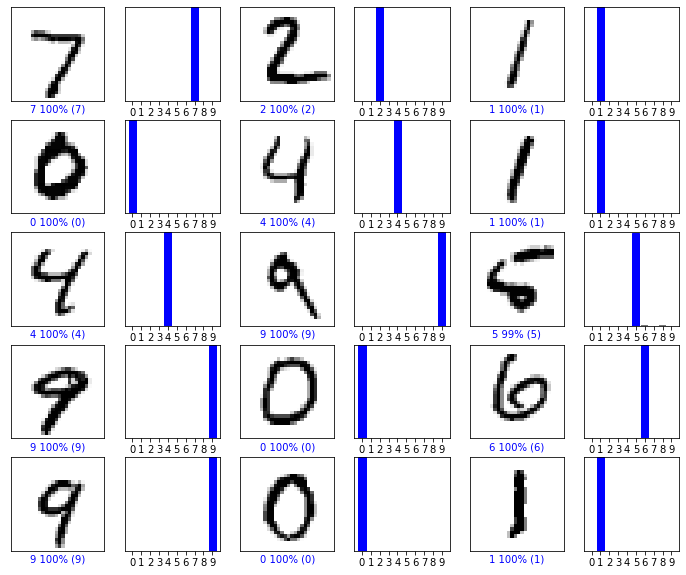

In [51]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred3, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred3, test_labels)
plt.show()

## Plot images and probability that model predicted wrong

In [21]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

# change num_cols, num_rows if you want to see more result.  
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

## Find index of wrong prediction
## Plot first 10 wrong predicted images and probability

In [22]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[33, 149, 247, 259, 282, 321, 340, 350, 381, 445]


In [52]:
index2 = error_mnist(pred2, test_labels)
index_slice2 = index2[:10]
print(index2[:10])

[115, 149, 151, 199, 250, 259, 266, 321, 326, 340]


In [53]:
index3 = error_mnist(pred3, test_labels)
index_slice3 = index3[:10]
print(index3[:10])

[104, 151, 193, 247, 318, 320, 340, 359, 445, 449]


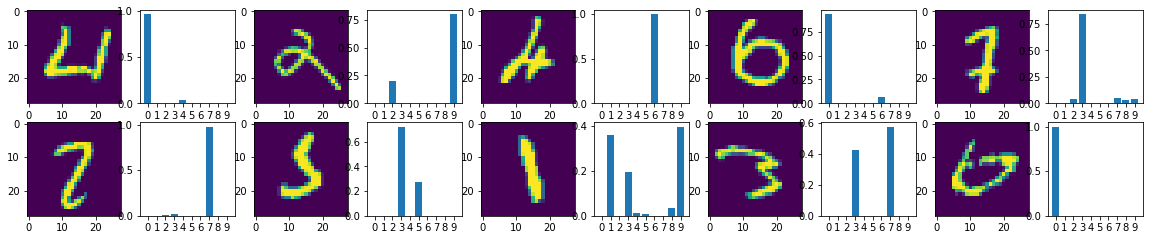

In [23]:
plot_error(index_slice, pred, test_labels)

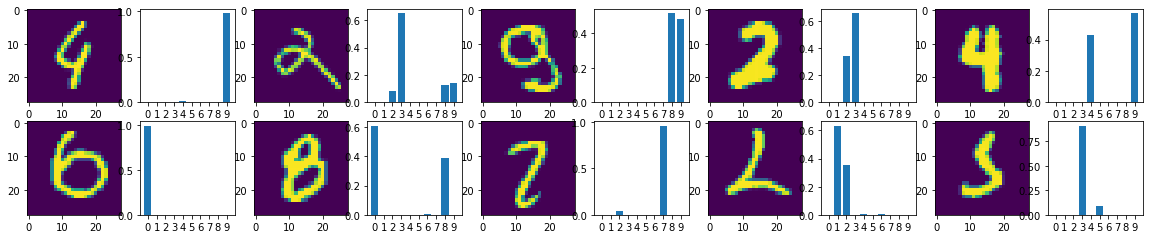

In [54]:
plot_error(index_slice2, pred2, test_labels)

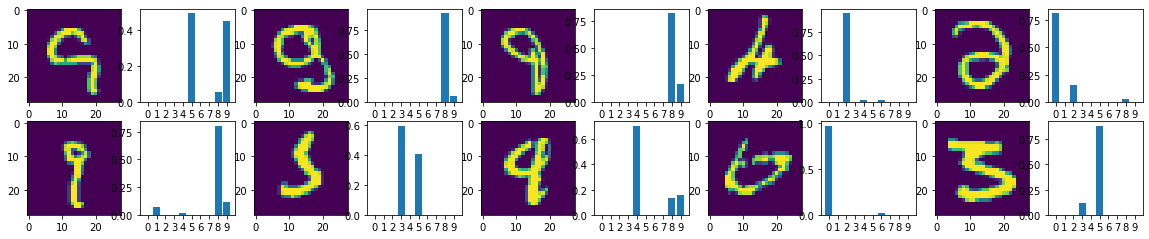

In [55]:
plot_error(index_slice3, pred3, test_labels)

In [ ]:
DONE